# Formula 1 Prediction

In [1]:
import pandas as pd       
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Loading and Reviewing the Data

In [2]:
df = pd.read_csv("f1data.csv")

In [3]:
df.shape

(407, 34)

In [4]:
df.head(5)

,year,racenumber,gp,Toro Rosso,Force India,Ferrari,Marussia,Williams,McLaren,Caterham,...,avgstart,pteam,teampts,pdriver,driverpts,pit stops,dnf,points,podium,finish
0,2014,1,australia,0,0,1,0,0,0,0,...,5.0,12.000,18,10.000,12,2,0,1,0,4.0
1,2014,2,malaysia,0,0,1,0,0,0,0,...,4.0,15.000,12,11.000,12,3,0,1,0,4.0
2,2014,3,bahrain,0,0,1,0,0,0,0,...,9.5,13.500,3,11.500,2,3,0,1,0,9.0
3,2014,4,china,0,0,1,0,0,0,0,...,5.0,8.250,19,6.750,15,2,0,1,1,3.0
4,2014,5,spain,0,0,1,0,0,0,0,...,7.0,13.625,14,10.875,8,3,0,1,0,6.0


### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| Team     | Indicating the team         |
| Age | driver (years)         |
| Driver | Name of the Driver | Don't believe this is relavant for this prediction
| Track Type | Road course or street course |
| year | yea |
| gp |  Name of the grand prix |
| p1,p2,p3 |  Practice positions |
| pteam | average of the the previous teams points (starting from the first race 2014) |
| pdriver | average of the previous driver points (starting from the first race 2014) |
| pit stops | how many pit stops does the driver take | This is highly correlated to dnfs |


### Correlated Feature Check

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [5]:
def plot_corr(df, size=20):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


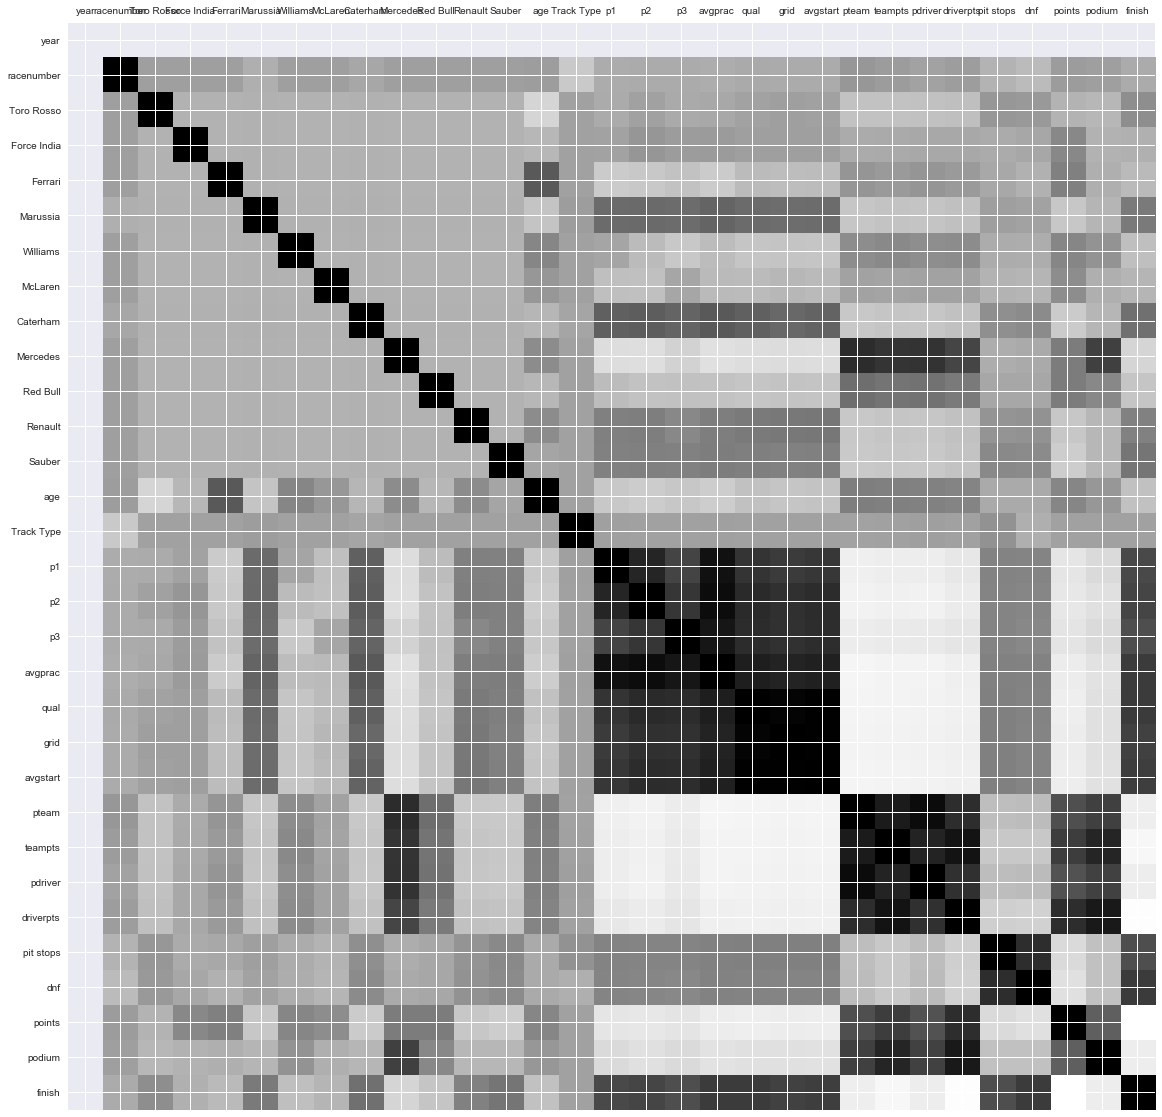

In [6]:
plot_corr(df)

In [7]:
del df['p1']
del df['p2']
del df['p3']
del df['qual']
del df['year']

Dropping similar features.

In [8]:
df.head(5)

,racenumber,gp,Toro Rosso,Force India,Ferrari,Marussia,Williams,McLaren,Caterham,Mercedes,...,avgstart,pteam,teampts,pdriver,driverpts,pit stops,dnf,points,podium,finish
0,1,australia,0,0,1,0,0,0,0,0,...,5.0,12.000,18,10.000,12,2,0,1,0,4.0
1,2,malaysia,0,0,1,0,0,0,0,0,...,4.0,15.000,12,11.000,12,3,0,1,0,4.0
2,3,bahrain,0,0,1,0,0,0,0,0,...,9.5,13.500,3,11.500,2,3,0,1,0,9.0
3,4,china,0,0,1,0,0,0,0,0,...,5.0,8.250,19,6.750,15,2,0,1,1,3.0
4,5,spain,0,0,1,0,0,0,0,0,...,7.0,13.625,14,10.875,8,3,0,1,0,6.0


Check for additional correlations

The correlations look good.  There appear to be no coorelated columns.

In [25]:
sns.set(style="whitegrid")

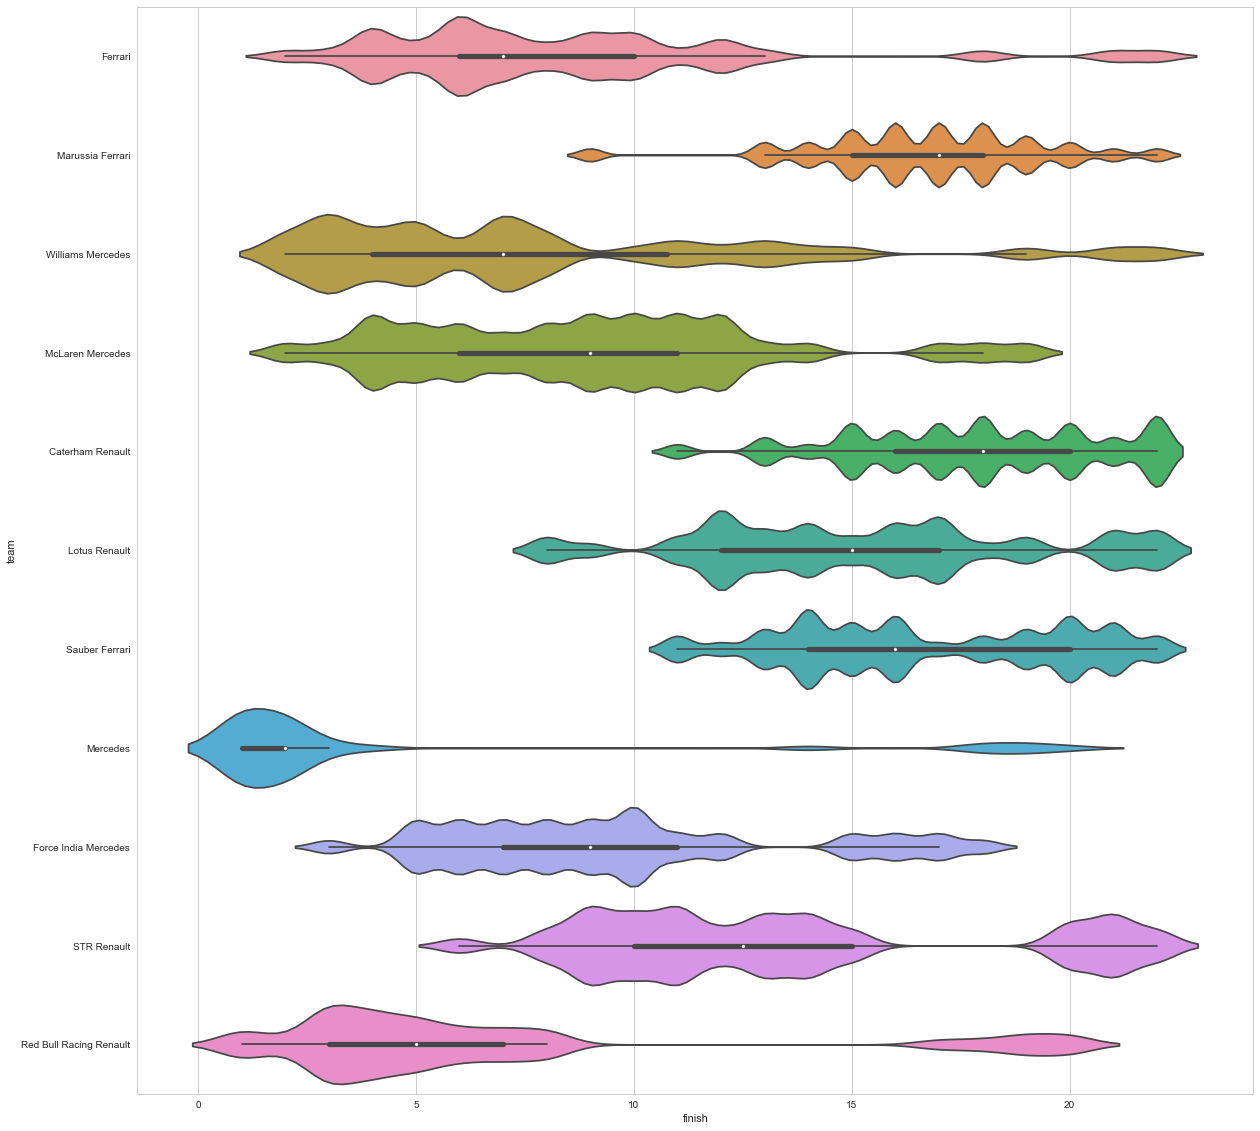

In [26]:
fig, ax = plt.subplots(figsize=(20,20))
sns.violinplot(x=df["finish"], y=df["team"], data=df,
               bw=.1, scale="count", scale_hue=False,ax=ax);

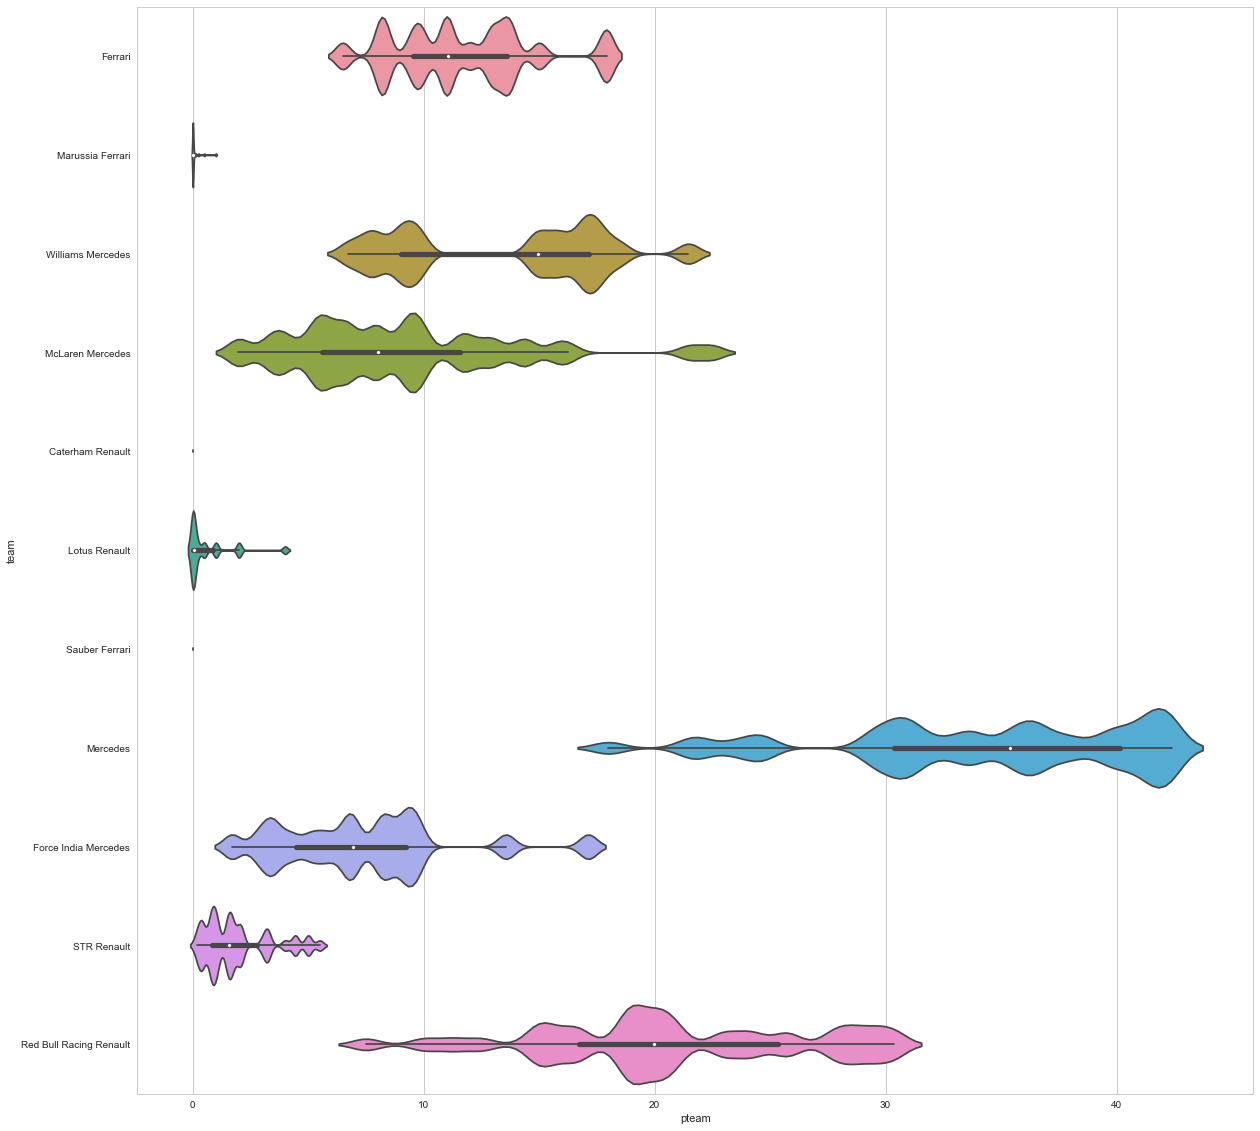

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
sns.violinplot(x=df["pteam"], y=df["team"], data=df,
               bw=.1, scale="count", scale_hue=False,ax=ax)

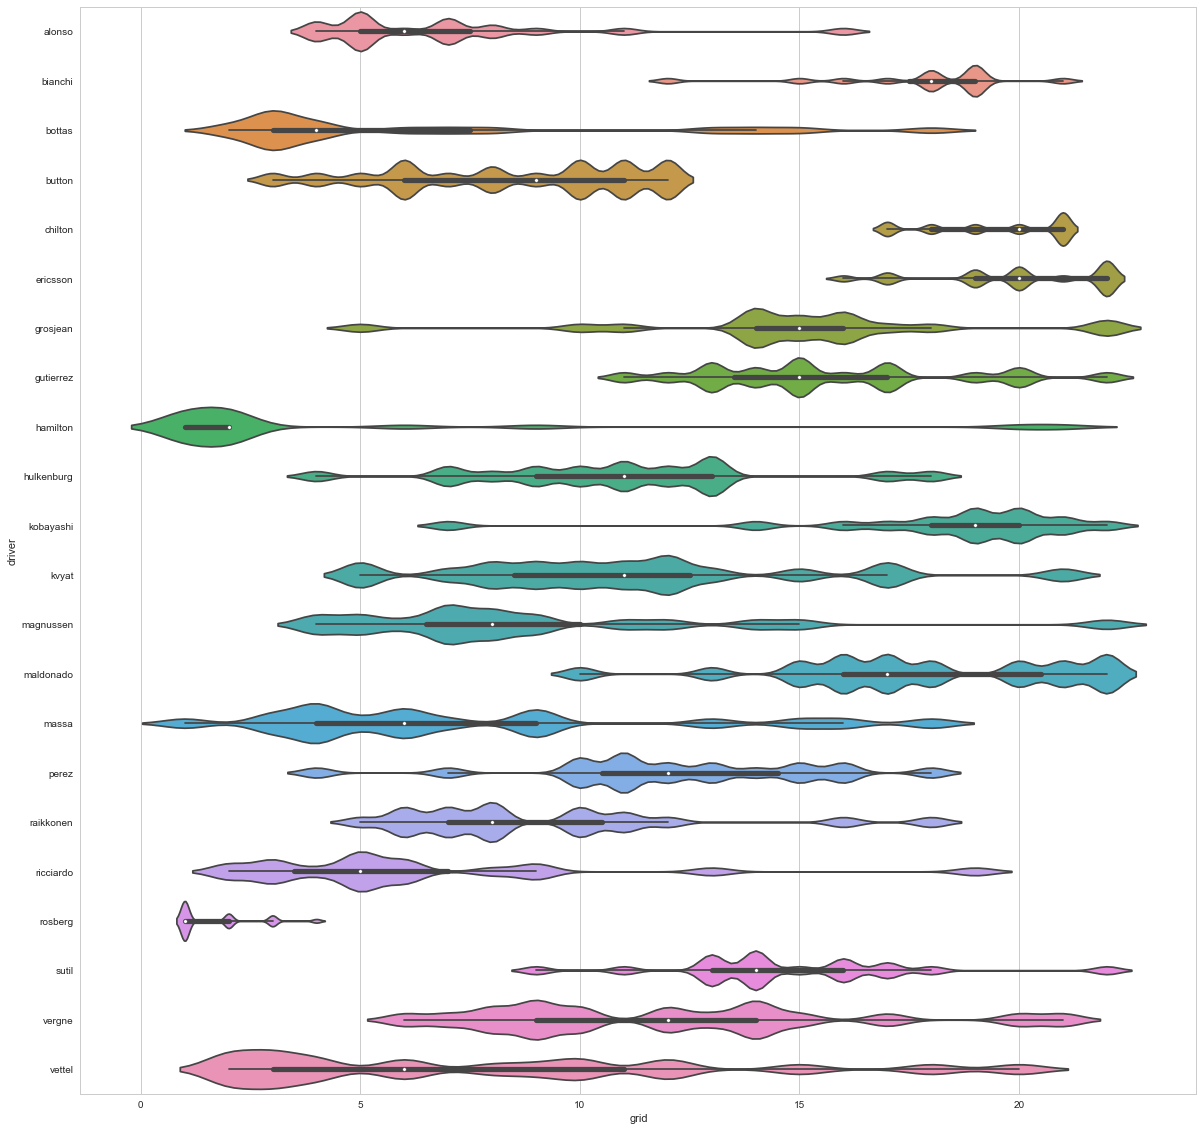

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
sns.violinplot(x=df["grid"], y=df["driver"], data=df,
               bw=.1, scale="count", scale_hue=False,ax=ax);

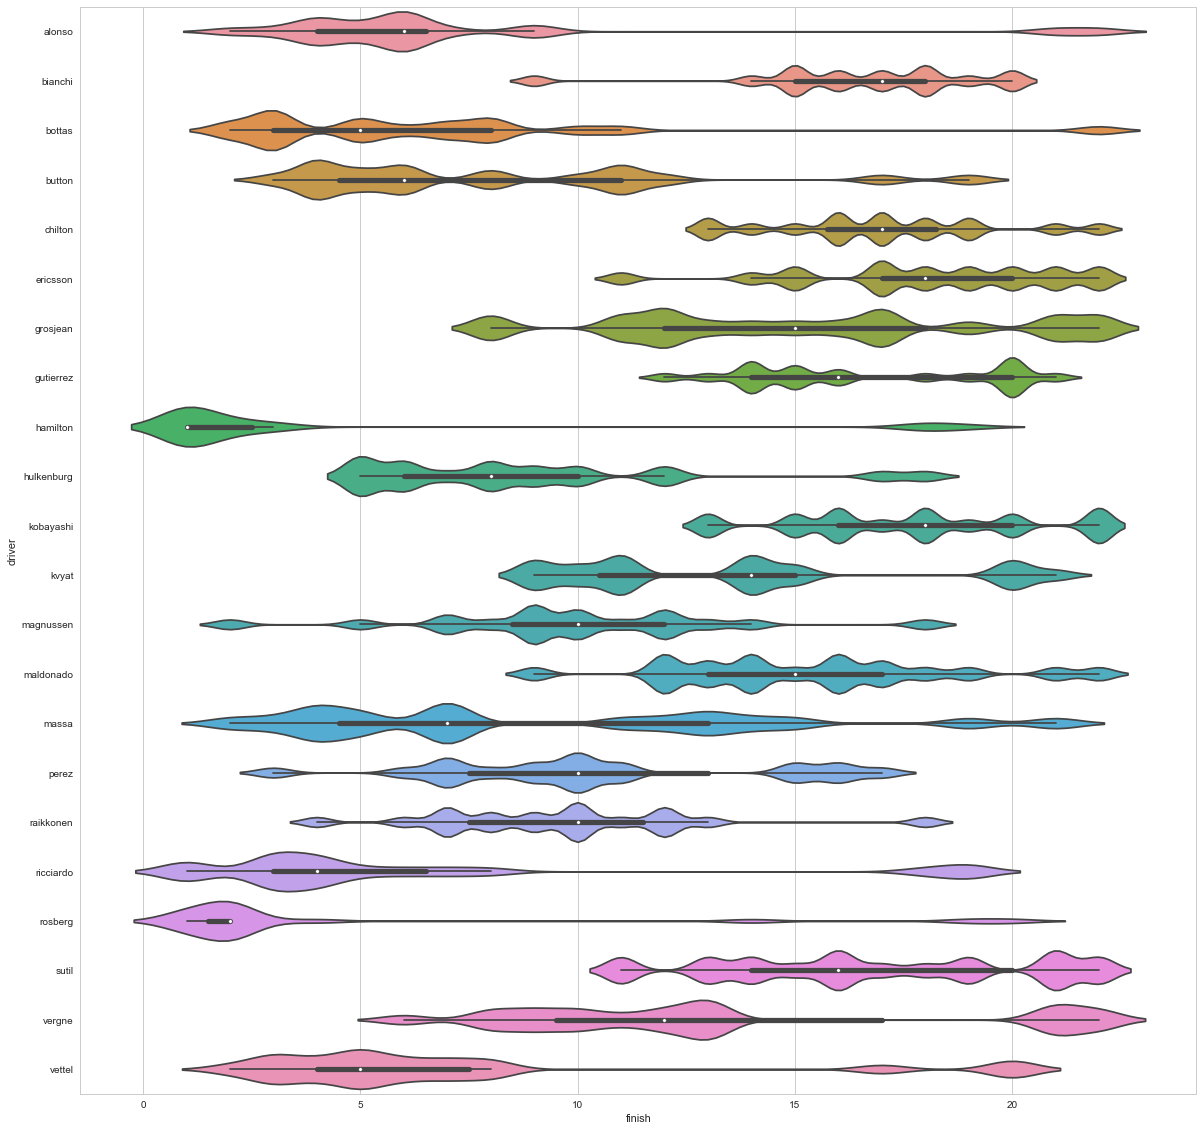

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.violinplot(x=df["finish"], y=df["driver"], data=df,
               bw=.1, scale="count", scale_hue=False,ax=ax);

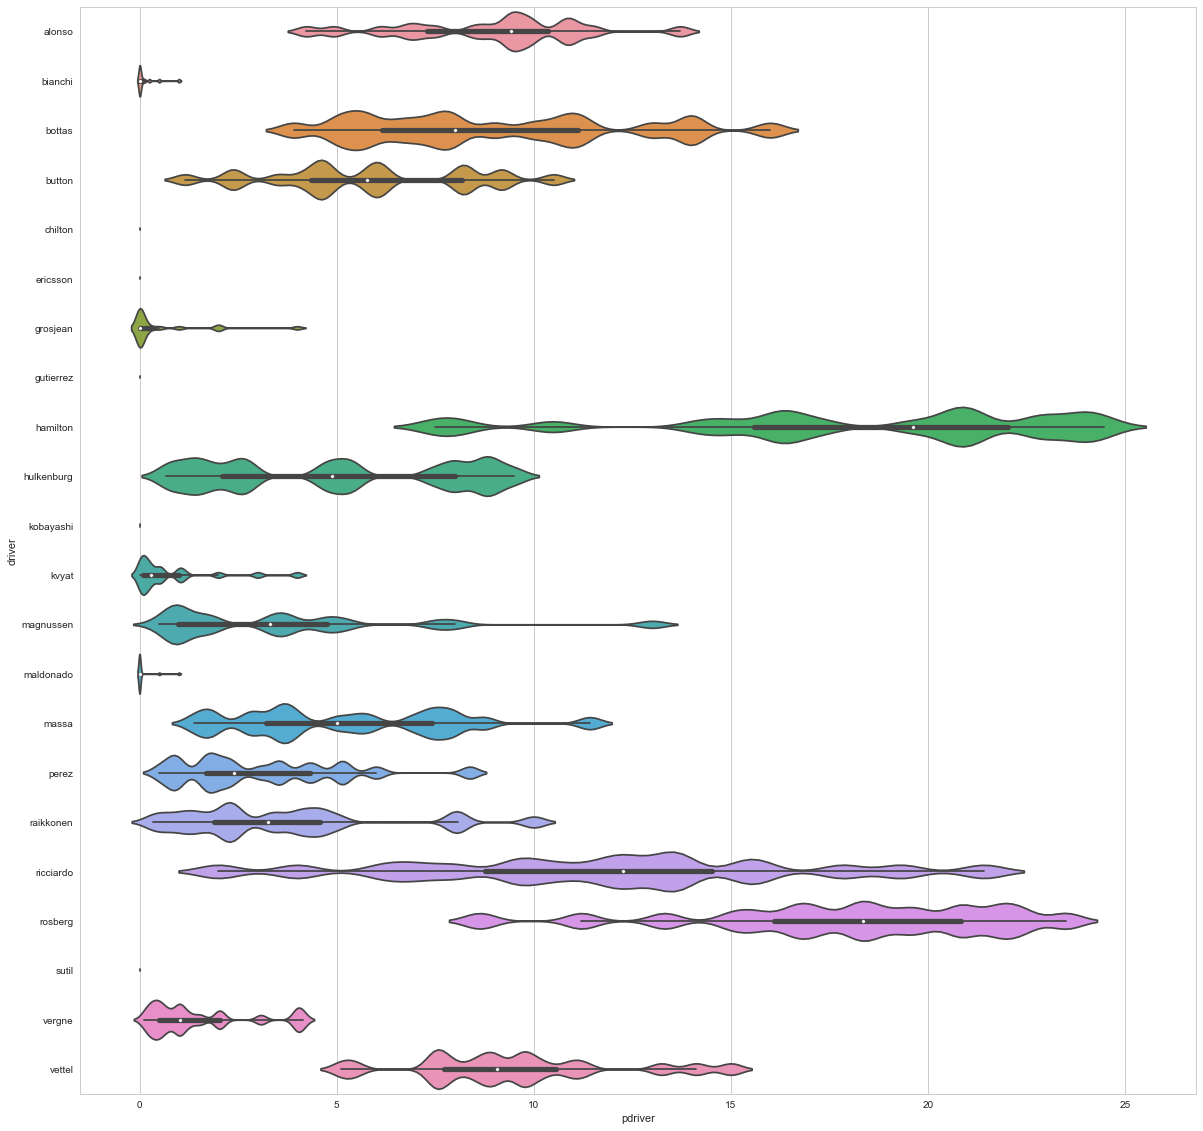

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
sns.violinplot(x=df["pdriver"], y=df["driver"], data=df,
               bw=.1, scale="count", scale_hue=False,ax=ax);

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [27]:
df.head(5)

,racenumber,gp,Toro Rosso,Force India,Ferrari,Marussia,Williams,McLaren,Caterham,Mercedes,...,avgstart,pteam,teampts,pdriver,driverpts,pit stops,dnf,points,podium,finish
0,1,australia,0,0,1,0,0,0,0,0,...,5.0,12.000,18,10.000,12,2,0,1,0,4.0
1,2,malaysia,0,0,1,0,0,0,0,0,...,4.0,15.000,12,11.000,12,3,0,1,0,4.0
2,3,bahrain,0,0,1,0,0,0,0,0,...,9.5,13.500,3,11.500,2,3,0,1,0,9.0
3,4,china,0,0,1,0,0,0,0,0,...,5.0,8.250,19,6.750,15,2,0,1,1,3.0
4,5,spain,0,0,1,0,0,0,0,0,...,7.0,13.625,14,10.875,8,3,0,1,0,6.0


### Check class distribution 

Rare events are hard to predict

In [28]:
num_obs = len(df)
num_true = len(df.loc[df['podium'] == 1])
num_false = len(df.loc[df['podium'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  57 (14.00%)
Number of False cases: 350 (86.00%)


Good distribution of true and false cases.  No special work needed.

### Spliting the data 

70% for training, 30% for testing

In [29]:
from sklearn.cross_validation import train_test_split

feature_col_names = ["Toro Rosso","Force India","Ferrari","Marussia","Williams",
                     "McLaren","Caterham","Mercedes","Red Bull","Renault","age","pteam"]
predicted_class_names = ["podium"]

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [30]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.78% in training set
30.22% in test set


#### Verifying predicted value was split correctly

In [31]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['podium'] == 1]), (len(df.loc[df['podium'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['podium'] == 0]), (len(df.loc[df['podium'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 57 (14.00%)
Original False : 350 (86.00%)

Training True  : 42 (14.79%)
Training False : 242 (85.21%)

Test True      : 15 (12.20%)
Test False     : 108 (87.80%)


### Post-split Data Preparation

#### Hidden Missing Values

In [25]:
df.head()

,Toro Rosso,Force India,Ferrari,Marussia,Williams,McLaren,Caterham,Mercedes,Red Bull,Renault,...,age,Track Type,avgprac,avgstart,pteam,pdriver,pit stops,points,podium,finish
0,0,0,1,0,0,0,0,0,0,0,...,32,1,2.333333,5.0,12.000,10.000,2,1,0,4
1,0,0,1,0,0,0,0,0,0,0,...,32,1,7.666667,4.0,15.000,11.000,3,1,0,4
2,0,0,1,0,0,0,0,0,0,0,...,32,1,4.333333,9.5,13.500,11.500,3,1,0,9
3,0,0,1,0,0,0,0,0,0,0,...,32,1,8.000000,5.0,8.250,6.750,2,1,1,3
4,0,0,1,0,0,0,0,0,0,0,...,32,1,3.666667,7.0,13.625,10.875,3,1,0,6


## Training Initial Algorithm - Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [33]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.4965



### Performance on Testing Data

In [34]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


Accuracy: 0.4634


#### Metrics

In [35]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))


Confusion Matrix
[[15  0]
 [66 42]]

Classification Report
             precision    recall  f1-score   support

          1       0.19      1.00      0.31        15
          0       1.00      0.39      0.56       108

avg / total       0.90      0.46      0.53       123



## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Predict Training Data

In [38]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9824


### Predict Test Data

In [39]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.9024


In [40]:
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

[[  6   9]
 [  3 105]]

Classification Report
             precision    recall  f1-score   support

          1       0.67      0.40      0.50        15
          0       0.92      0.97      0.95       108

avg / total       0.89      0.90      0.89       123



## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: 0.8943
[[  6   9]
 [  4 104]]

Classification Report
             precision    recall  f1-score   support

          1       0.60      0.40      0.48        15
          0       0.92      0.96      0.94       108

avg / total       0.88      0.89      0.88       123



Setting regularization parameter

1st max value of 0.600 occured at C=3.100


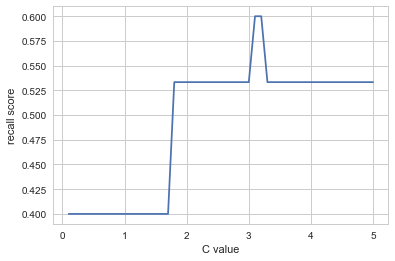

In [42]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")



### Logisitic regression with class_weight='balanced'

1st max value of 0.867 occured at C=0.200


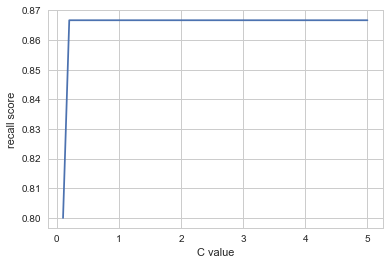

In [43]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")



In [44]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.8943
[[13  2]
 [11 97]]

Classification Report
             precision    recall  f1-score   support

          1       0.54      0.87      0.67        15
          0       0.98      0.90      0.94       108

avg / total       0.93      0.89      0.90       123

0.866666666667


### LogisticRegressionCV

In [45]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

### Predict on Test data

In [46]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.8943
[[13  2]
 [11 97]]

Classification Report
             precision    recall  f1-score   support

          1       0.54      0.87      0.67        15
          0       0.98      0.90      0.94       108

avg / total       0.93      0.89      0.90       123



In [60]:
from sklearn import tree
import numpy as np